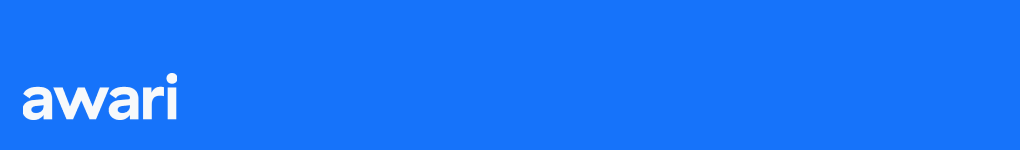

Prática da **Aula 05: \[Introdução ao tratamento de arquivos com Python e Pandas\]**, do curso de **Engenharia de Dados** da **[Awari](https://awari.com.br/)**. Tratamento de arquivos com Python e Pandas. 

---

# Importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd

# Series
Uma **'Series'** funciona como um array de uma dimensão, uma lista de valores. Toda **'Series'** possui um indice, o index, que dá rótulos/identificação a cada elemento de uma lista.


In [ ]:
# Examplo de séries com texto
frutas = pd.Series(['banana', 'maça', 'uva', 'abacaxi', 'morango'], name = 'Frutas') # Name não é obrigatório
print(frutas)
print("=======")
print(frutas.values)
print("=======")
print(frutas.index)

In [ ]:
# Examplo de séries com números
impares = pd.Series([1, 3, 5, 7, 9])

print(impares)
print("=======")
print(impares.values)
print("=======")
print(impares.index)

In [ ]:
# Examplo de séries informando os INDICES
alunos = pd.Series([2,7,5,10,6], index=["Alex", "João", "Jéssica", "Bernardo", "Paulo"])

print(alunos)
print("=======")
print(alunos.values)
print("=======")
print(alunos.index)
print("=======")
print(alunos["Bernardo"])

# DataFrame
Diferente de Series, **DataFrame** possui uma estrutura bidemensial, como uma planilha de Excel.

In [ ]:
data = {
    'macas': [3, 2, 0, 1], 
    'laranjas': [0, 3, 7, 2]
}

compras = pd.DataFrame(data)

compras


In [ ]:
compras = pd.DataFrame(data, index=['Alex', 'Roberto', 'Bernardo', 'Paulo'])

compras

In [ ]:
# para extrair apenas uma Serie
compras.loc['Alex']

# Lendo informações de um CSV

In [ ]:
df = pd.read_csv('arquivos/customers.csv')

df

In [ ]:
# Apenas os 5 primeiros registros
df.head(5)

In [ ]:
# Quando carregamos um CSV os indices são gerados aleatoriamente por ordem da linha 
# caso queiramos especificar um indice, precisaremos informar qual a coluna é o indice

df = pd.read_csv('arquivos/customers.csv', index_col=0)
df.head(5)

# Lendo arquivos em JSON

In [ ]:
df = pd.read_json('./arquivos/estados.json', orient='records')

df

In [ ]:
# Lendo dados de uma URL
url = "https://api.exchangerate-api.com/v4/latest/USD"
df = pd.read_json(url)
print(df)

# Salvando DataFrame em JSON ou CSV

Podemos, usando a mesma lógica, carregar um arquivo JSON salvar em CSV e vice versa

In [ ]:
# Simples formato
df = pd.DataFrame([1,2,3])
print(df)
df.to_json("./arquivos/numeros_json.json")
df.to_csv("./arquivos/numeros_csv.json")
!ls ./arquivos

In [ ]:
df = pd.DataFrame([1,2,3], columns=['Numeros'])
df.to_json("./arquivos/numeros_json2.json")
df.to_csv("./arquivos/numeros_csv2.csv")
!ls ./arquivos

# Tratando um arquivo

In [ ]:
df = pd.read_csv('./arquivos/4300Answers.csv')
df.head(2) # Checar colunas com NaN 

In [ ]:
# Convertendo colunas NaN para "-"
df = df.fillna("-") # Nós precisamos atrelar o resultado a variavel principal
df.head(2) # Checar colunas novamente

In [ ]:
# Retornando apenas o sexo Feminino
resultado_query=df.query("`Qual seu sexo?` == 'Feminino'")
resultado_query.head(2)

In [ ]:
# Salvando novo Json apenas com os resultados femininos
resultado_query.to_csv("./arquivos/4300Answers_femininos.csv")

In [ ]:
# Lendo arquivo gerado
df = pd.read_csv("./arquivos/4300Answers_femininos.csv")
df.head(5)

In [ ]:
def SQL_CREATE_STATEMENT_FROM_DATAFRAME(SOURCE, TARGET):

# SQL_CREATE_STATEMENT_FROM_DATAFRAME(SOURCE, TARGET)
# SOURCE: source dataframe
# TARGET: target table to be created in database

    sql_text = "DROP TABLE " + TARGET + "; "
    sql_text = sql_text + (pd.io.sql.get_schema(SOURCE.reset_index(), TARGET))
    return sql_text

def SQL_INSERT_STATEMENT_FROM_DATAFRAME(SOURCE, TARGET):
    sql_texts = []
    for index, row in SOURCE.iterrows():       
        sql_texts.append('INSERT INTO '+TARGET+' ('+ str(', '.join(SOURCE.columns))+ ') VALUES '+ str(tuple(row.values)))        
    return sql_texts

In [ ]:
# Lendo arquivo gerado
df = pd.read_csv("./arquivos/4300Answers_femininos.csv")

print(SQL_CREATE_STATEMENT_FROM_DATAFRAME(df, "TABELA"))

---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**